<img src="images/ublogo.png"/>

### CSE610 - Bayesian Non-parametric Machine Learning

  - Lecture Notes
  - Instructor - Varun Chandola
  - Term - Fall 2020

### Objective
The objective of this notebook is to provide detailed discussions about Gaussian Processes (GP) and Gaussian Process Regression (GPR).

<div class="alert alert-info">

**Note:** This material is based on Chapter 2 of the GPML book.

</div>

### Prior on the regression function

- Regression: $y = f({\bf x}) + \epsilon$
- Linear regression: $f({\bf x}) = {\bf w}^\top{\bf x}$
  * Fixing the form of $f(\cdot)$
  * But what about other $f(\cdot)$'s
- **Gaussian Process** puts a prior on $f(\cdot)$

### Gaussian Process

> Definition: A **Gaussian Process** or GP, is a collection of random variables, any finite number of which are jointly Gaussian. 

A GP is fully specified by a mean function, $m({\bf x})$ and a covariance function, $k({\bf x},{\bf x}')$. 

Consider a random process, $f({\bf x})$
> Question: Why is $f({\bf x})$ a random process and not a function of ${\bf x}$?

The mean and covariance functions are defined as:
$$
m({\bf x}) = \mathbb{E}[f({\bf x})]\\
k({\bf x},{\bf x}') = \mathbb{E}[(f({\bf x}) - m({\bf x}))(f({\bf x}') - m({\bf x}'))]
$$

<div class="alert alert-info">
Note: For notational simplicity, the mean function is assumed to be 0, i.e., $m({\bf x}) = {\bf 0}$.
</div>

#### Understanding GP
So what does it mean that the GP puts a prior on the possible functions?
- Given a set of inputs, ${\bf x}_1,{\bf x}_2,\ldots,{\bf x}_N$, defined over an input domain, $\mathcal{X}$
- There can be infinite possible functions that are defined over $\mathcal{X}$
- A GP prior allows only those functions whos function values, i.e.,
$$
f({\bf x}_1),f({\bf x}_2),\ldots,f({\bf x}_N)
$$
are jointly Gaussian
> Example: 
  - If we have only one input, the GP prior only *allows* those functions ($f(\cdot)$) such that $f({\bf x}_1)$ is generated from a 1-D Gaussian whose mean is $m({\bf x}_1)$ and variance is $k({\bf x}_1,{\bf x}_1)$
  - If we have two inputs, the GP prior only *allows* those functions, such that $f({\bf x}_1),f({\bf x}_2)$ is generated from a 2-D Gaussian whose mean is $m({\bf x}_1),m({\bf x}_2)$ and covariance is:
  $$
  \left[
  \begin{array}{cc}
  k({\bf x}_1,{\bf x}_1) & k({\bf x}_1,{\bf x}_2)\\
  k({\bf x}_1,{\bf x}_2) & k({\bf x}_2,{\bf x}_2)
  \end{array}
  \right]
  $$
  - and so on $\ldots$

<div class="alert alert-info">
Note: The key thing to understand here is that GP is not going to give you an explicit prior on the functions (that would be impossible). Instead, it provides a prior on the values that the function sampled from the GP prior can take. The function can be evaluated on any number of input points, the GP prior will always give you a prior on those function values.
</div>

#### Role of the mean function
The mean function determines the mean vector of the multi-variate Gaussian distribution that is created from the values of the function $f(\cdot)$. For the following discussions we will assume that $m({\bf x}) = {\bf 0}$, which means that the mean of the multi-variate Gaussian is ${\bf 0}$. However, this is not always the case. We can also use functions that depend on ${\bf x}$.
#### Role of the covariance/kernel function
The covariance function $k(\cdot,\cdot)$ specifies how the different inputs vary with respect to each other. In some ways, you can think of it as calculating the similarity between the various inputs.

> **Squared exponential (SE) covariance function** - we will start with this one.
$$
cov[f({\bf x},{\bf x}')] = k({\bf x},{\bf x}') = \exp(-\frac{1}{2}\Vert {\bf x} - {\bf x}'\Vert_2^2)
$$
> The covariance function is the function of the original inputs, ${\bf x}$ and ${\bf x}'$. For SE, if ${\bf x}$ and ${\bf x}'$ are close to each other, then the covariance will be high, otherwise it will be low.

### Visualizing functions sampled from a GP
So how does this impose a distribution over functions.

Consider a set of inputs:

In [1]:
%run Utilities.ipynb

In [2]:
X = np.linspace(-5,5,50)
X = X[:,np.newaxis]
print(X)

[[-5.        ]
 [-4.79591837]
 [-4.59183673]
 [-4.3877551 ]
 [-4.18367347]
 [-3.97959184]
 [-3.7755102 ]
 [-3.57142857]
 [-3.36734694]
 [-3.16326531]
 [-2.95918367]
 [-2.75510204]
 [-2.55102041]
 [-2.34693878]
 [-2.14285714]
 [-1.93877551]
 [-1.73469388]
 [-1.53061224]
 [-1.32653061]
 [-1.12244898]
 [-0.91836735]
 [-0.71428571]
 [-0.51020408]
 [-0.30612245]
 [-0.10204082]
 [ 0.10204082]
 [ 0.30612245]
 [ 0.51020408]
 [ 0.71428571]
 [ 0.91836735]
 [ 1.12244898]
 [ 1.32653061]
 [ 1.53061224]
 [ 1.73469388]
 [ 1.93877551]
 [ 2.14285714]
 [ 2.34693878]
 [ 2.55102041]
 [ 2.75510204]
 [ 2.95918367]
 [ 3.16326531]
 [ 3.36734694]
 [ 3.57142857]
 [ 3.7755102 ]
 [ 3.97959184]
 [ 4.18367347]
 [ 4.3877551 ]
 [ 4.59183673]
 [ 4.79591837]
 [ 5.        ]]


We can have many functions that can be applied on this.

`sin(x)`,`x^3 + 5x^2 + 7`, `exp(x) + x^4 - cos(x)`,`x + 4`

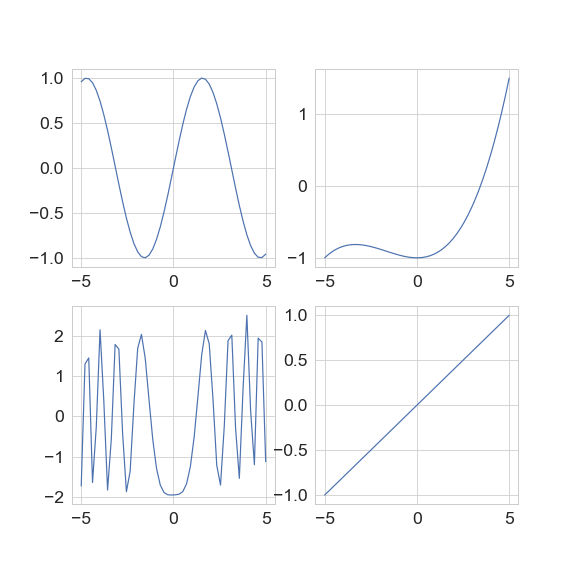

In [41]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].plot(X,np.sin(X))
axs[0,1].plot(X,0.01*(X**3 + 5*X**2)-1)
axs[1,0].plot(X,0.05*np.exp(X*0.5) + 0.01*X**2 - 2*np.cos(X**2))
axs[1,1].plot(X,0.2*X)


But are they sampled from the GP prior, $\sim \mathcal{GP}({\bf 0},SE))$?

This is how we can "sample a function" from a GP prior.

We use the inputs `X` to calculate the mean and covariance matrix for the corresponding multivariate Gaussian distribution:
$$
f({\bf x}_1),f({\bf x}_2),\ldots,f({\bf x}_N)
$$


In [4]:
def SE(X1, X2,l=1,sigma2f=1):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma2f*np.exp(-0.5*sqdist/l)

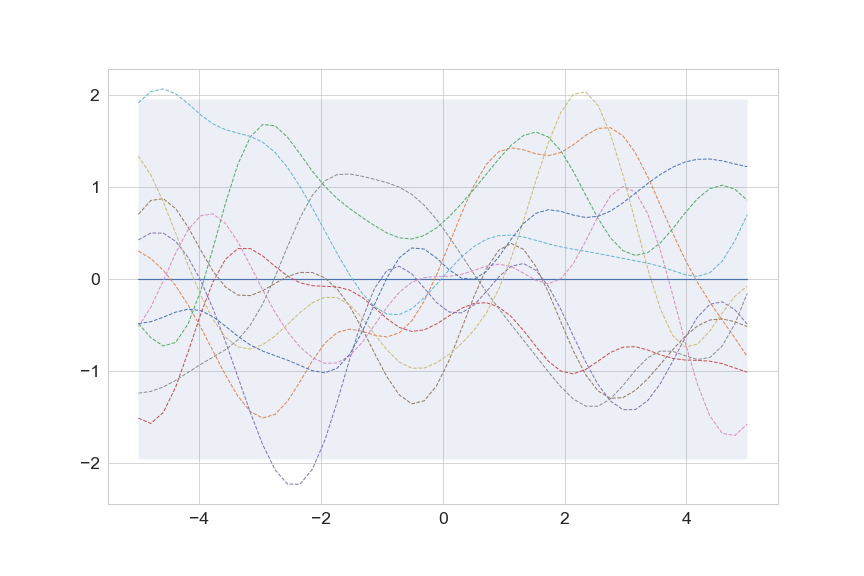

In [6]:
fig = plt.figure(figsize=(12,8))
means = np.zeros(X.shape) # assuming a zero mean-function
covmat = SE(X,X)
# Draw few samples from the prior
samples = np.random.multivariate_normal(means.ravel(),covmat, 10)

# Plot GP mean, confidence interval and samples 
plot_gp(means, covmat, X, samples=samples,legend=False)

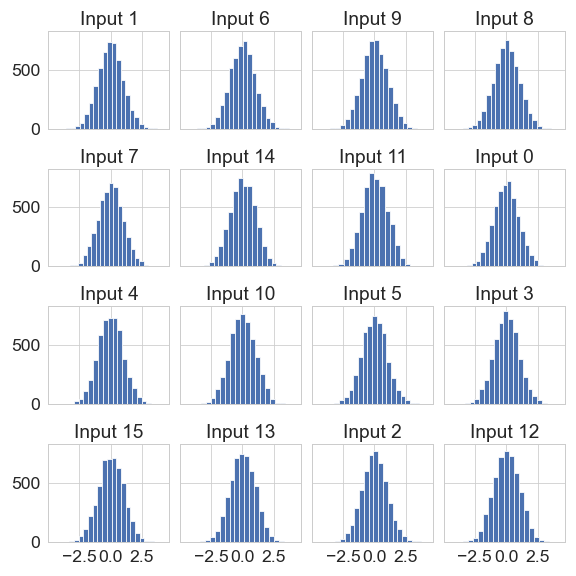

In [7]:
samples = np.random.multivariate_normal(means.ravel(),covmat, 5000)
sinds = np.random.permutation(16)
fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
for i,ax in enumerate(axs.ravel()):
    ax.hist(samples[:,sinds[i]],bins=20)
    ax.set_title('Input {}'.format(sinds[i]))
plt.tight_layout()

As we see above, the marginal distribution of the function value at any input is also a Gaussian. The mean of each marginal distribution is determined by the mean function, $m(\cdot)$. The variance will be determined by the covariance function, $k(\cdot,\cdot)$.

### Making the SE function more expressive
Usually, the SE function has two additional parameters, and is written as:
$$
cov[f({\bf x},{\bf x}')] = k({\bf x},{\bf x}') = \sigma^2_f\exp(-\frac{1}{2l}\Vert {\bf x} - {\bf x}'\Vert_2^2)
$$
The parameters $\sigma^2_f$ and $l$ are scalars hyper-parameters of the SE covariance function. The $l$ parameter is also known as the **length-scale** for the covariance function. 

Let us see what that means. Vary the `l` parameter in the cell below and check the sampled functions.

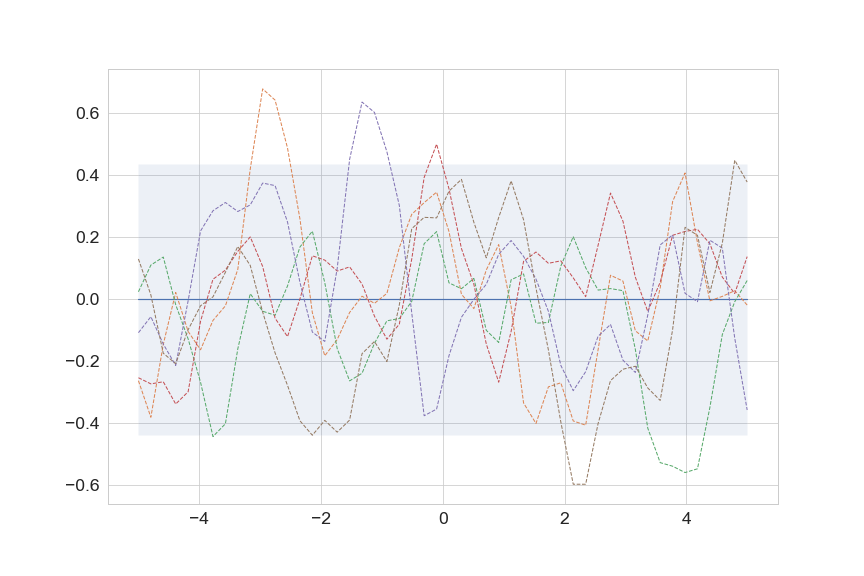

In [42]:
fig = plt.figure(figsize=(12,8))
means = np.zeros(X.shape) # assuming a zero mean-function
covmat = SE(X,X,l=0.1,sigma2f=0.05)
# Draw few samples from the prior
samples = np.random.multivariate_normal(means.ravel(),covmat, 5)

# Plot GP mean, confidence interval and samples 
plot_gp(means, covmat, X, samples=samples,legend=False)

So changing the length-scale changes the smoothness of the functions. Changing the $\sigma_f^2$ parameter changes the variance of the marginal distributions.

### Using GP for prediction
We are not really interested in sampling from the GP prior. What we need to know is, how can this help us for the prediction tasks.

Let us assume that we know the $f({\bf x}_1)$ for one input instance, ${\bf x}_1$. This is our training data. What can we say about the distribution of $f({\bf x}_*)$ for any unknown input ${\bf x}_*$?

Since $f(\cdot)$ follows a GP prior, it means that $f({\bf x}_1),f({\bf x}_*$ will be jointly Gaussian:
\begin{equation}
\left[
\begin{array}{c}
f({\bf x}_1)\\
f({\bf x}_*)
\end{array}
\right] \sim \mathcal{N}\left({\bf 0},
\left[
\begin{array}{cc}
k({\bf x}_1,{\bf x}_1)&k({\bf x}_1,{\bf x}_*)\\
k({\bf x}_1,{\bf x}_*)&k({\bf x}_*,{\bf x}_*)
\end{array}
\right]
\right)
\end{equation}
By the conditional property of the Gaussian distribution (as you would have solved in Homework 0), the conditional distribution, $p(f({\bf x}_*)\vert{\bf x}_*,{\bf x}_1,f({\bf x}_1))$ will also be a Gaussian distribution.

---

In general, if the training data set has $N$ instances (denoted by $X$), the joint distribution will be given by:

\begin{equation}
\left[
\begin{array}{c}
{\bf f}\\
f_*
\end{array}
\right] \sim \mathcal{N}\left({\bf 0},
\left[
\begin{array}{cc}
K&{\bf k}_*\\
{\bf k}_*&k({\bf x}_*,{\bf x}_*)
\end{array}
\right]
\right)
\end{equation}

> where $K$ is a $N \times N$ covariance/kernel matrix computed using the training data, i.e.,:
$$
K = \left[\begin{array}{ccc}
k({\bf x}_1,{\bf x}_1) & k({\bf x}_1,{\bf x}_2)& \ldots & k({\bf x}_1,{\bf x}_N)\\
k({\bf x}_2,{\bf x}_1) & k({\bf x}_2,{\bf x}_2)& \ldots & k({\bf x}_2,{\bf x}_N)\\
\vdots&\vdots&\ddots&\vdots\\
k({\bf x}_N,{\bf x}_1) & k({\bf x}_N,{\bf x}_2)& \ldots & k({\bf x}_N,{\bf x}_N)\\
\end{array}
\right]
$$
> and ${\bf f}$ is a $N\times 1$ vector containing the known functional values for the training data:
$$
{\bf f} = \left[\begin{array}{c}
f({\bf x}_1)\\
f({\bf x}_1)\\
\vdots\\
f({\bf x}_N)
\end{array}\right]
$$
> and ${\bf k}_*$ is a $N\times 1$ vector that contains the kernel function evaluations between every training instance and the test instance:
$$
{\bf k}_* = \left[\begin{array}{c}
k({\bf x}_1,{\bf x}_*)\\
k({\bf x}_1,{\bf x}_*)\\
\vdots\\
k({\bf x}_N,{\bf x}_*)
\end{array}\right]
$$

The posterior predictive distribution for the function value at a test instance, ${\bf x}_*$, will be given by:
\begin{equation}
p(f_*\vert {\bf x}_*,X,{\bf f}) = \mathcal{N}\left({\bf k}_*^\top K^{-1}{\bf f},k({\bf x}_*,{\bf x}_*) - {\bf k}_*^\top K^{-1}{\bf k}_*\right)
\end{equation}

Which means that, given some training data, we can again sample functions from the GP *posterior*

In [67]:
def posterior_predictive(X_s, X_train, F_train, l=1.0, sigma_2f=1.0):
    K = SE(X_train, X_train, l, sigma_2f)
    K_s = SE(X_train, X_s, l, sigma_2f)
    K_ss = SE(X_s, X_s, l, sigma_2f)
    K_inv = np.linalg.inv(K)
    mu_s = K_s.T.dot(K_inv).dot(F_train)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    return mu_s, cov_s

In [68]:
X_train = np.array([[1.4],[-2],[0]])
F_train = np.array([[1],[-1],[0]])

In [69]:
mu_s,cov_s = posterior_predictive(X,X_train,F_train)
samples = np.random.multivariate_normal(mu_s.ravel(),cov_s, 5)

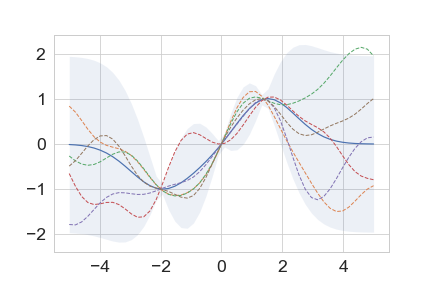

In [72]:
plot_gp(mu_s, cov_s, X,samples=samples,legend=False)

Note that the above calculations can be done for any dimensional ${\bf x}$ and not just single-dimensional. The visualization will become more challenging.

### Predictions using noisy observations (Gaussian Process Regression)
In real world, we will not have access to the function values in the training set, i.e., $f({\bf x}_1),\ldots$. Instead, it is more realistic to assume the availability of noisy versions of the function values, i.e., 
$$
y = f(\bf x) + \epsilon
$$

If we assume $\epsilon$ to be i.i.d Gaussian noise, i.e., $\epsilon \sim \mathcal{N}(0,\sigma_n^2$, then:
$$
cov(y_p,y_q) = k({\bf x}_p,{\bf x}_q) + \sigma^2_n \delta_{pq}
$$
where $\delta_{pq}$ is the *Kronecker delta*, which is 1 if $p = q$ and 0, otherwise.
> Question: Why?

For the vector ${\bf y}$,
$$
cov({\bf y}) = K + \sigma^2_nI
$$
where $I$ is the $N \times N$ identity matrix.

The joint distribution of the observed target values (${\bf y}$) and the function value at the new test location, $f_*$ will be:
\begin{equation}
\left[
\begin{array}{c}
{\bf y}\\
f_*
\end{array}
\right] \sim \mathcal{N}\left({\bf 0},
\left[
\begin{array}{cc}
K + \sigma_n^2I&{\bf k}_*\\
{\bf k}_*&k({\bf x}_*,{\bf x}_*)
\end{array}
\right]
\right)
\end{equation}

Using the same strategy as earlier, we can use the conditional Gaussian identity to get the expressions for the predictive mean and variance at a test instance, ${\bf x}_*$:
\begin{eqnarray}
\bar{f}_* & = & {\bf k}_*^\top(K + \sigma_n^2I)^{-1}{\bf y}\\
var[f_*] & = & k({\bf x}_*,{\bf x}_*) - {\bf k}_*^\top(K + \sigma_n^2I)^{-1}{\bf k}_*
\end{eqnarray}

<div class="alert alert-success">

**Note:** These two equations are possibly the most fundamental equations for Gaussian processes regression.

</div>

> Question: What will be the predictive distribution for $y_*$?

---



In [81]:
def posterior_predictive_noisy(X_test, X_train, y_train, l=1.0, sigma_2f=1.0, sigma_2n=1.0):
    K = SE(X_train, X_train, l, sigma_2f)
    K = K + np.eye(X_train.shape[0])*sigma_2n
    K_s = SE(X_train, X_test, l, sigma_2f)
    K_ss = SE(X_test, X_test, l, sigma_2f)
    K_inv = np.linalg.inv(K)
    mu_s = K_s.T.dot(K_inv).dot(y_train)
    cov_s = (K_ss - K_s.T.dot(K_inv).dot(K_s)) + np.eye(X_test.shape[0])*sigma_2n
    return mu_s, cov_s

In [82]:
X_train = np.array([[1.4],[-2],[0]])
y_train = np.array([[1],[-1],[0]])

In [83]:
y_pred_mean,y_pred_cov = posterior_predictive_noisy(X,X_train,y_train,sigma_2n=0)
samples = np.random.multivariate_normal(mu_s.ravel(),cov_s, 5)

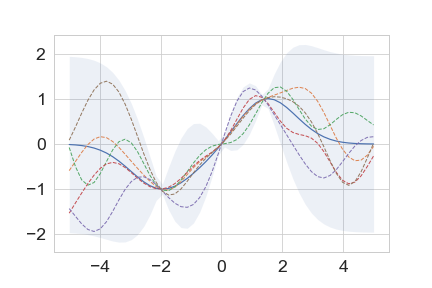

In [84]:
plot_gp(y_pred_mean,y_pred_cov, X,samples=samples,legend=False)

### Getting predictions for multiple test instances simultaneously
If you carefully look at the predictive equations for GPR, you can get the predictions for multiple test instance at the same time. The interesting part is the covariance matrix which does not only provide us with the variance associated with each prediction, but also the covariance between the different test instance.

In [ ]:
plt.plot(y_pred_cov[8,:])

### Marginal likelihood of training data
Later we will see how to learn the hyper-parameters of the covariance/kernel function (e.g., length-scale, etc.) from the observed data.

For this, we will need to compute the *marginal likelihood* of the training data set or $p({\bf y}\vert X)$, which can be calculated as:
$$
p({\bf y}\vert X) = \int p({\bf y}\vert {\bf f},X)p({\bf f}\vert X)d{\bf f}
$$
essentially the *marginalization* over the latent function values, ${\bf f}$.